# Demonstration of LPF File Parsing

Overview of the functionality of the Python LPF parsing utilities. These can be used for more in-depth validaton of correct LPF programming than the simulation available in the LPI.

In [1]:
%matplotlib inline
import numpy as np
import os, sys

paths = {}
paths['dir'] = os.path.abspath(os.path.dirname(os.path.realpath('__file__')))
paths['TestFile'] = os.path.join(paths['dir'],'program.lpf')

sys.path.append(paths['dir'])
import LPFParser as lpfp

### Parse the LPF File

Parse the file with `LPFtoArray`, which has the following arguments:
```
LPFtoArray(LPFfile, rowNum=4, colNum=6, channelNum=2, verbose=True)
```

In this case, we'll leave all the optional arguments at their default values, since this LPF comes from a standard 24-well device with 2 LEDs in each well.

In [2]:
lpfdata = lpfp.LPFtoArray(paths['TestFile'])

Header:
	(1, 48, 1000, 7381, 0, 0, 0, 0)
Header Data:
	LPF ver: 1
	Number of channels (total): 48
	Time step: 1000 (ms)
	Number of time steps: 7381
Intensity Data:
	Parsed 7381 time points (123.2fmin)


The header data for the LPF file is listed here to allow the user to validate that everything looks correct. To suppress this functionality, set the `verbose` flag to `False`. This header data is always available in the returned dict with the key `header`:

In [3]:
lpfdata['header']

(1, 48, 1000, 7381, 0, 0, 0, 0)

### Plot LPF intensities for a particular well

Use the `plotLPFData` function to create a simple plot of the results. The function can take numerous optional arguments to specify which wells/channels are plotted, and modifications that can be made to the plot, which we'll define some parameters for below. For detailed documentation on this function, just use the integrated help utility: `?lpfp.plotLPFData`.

In [4]:
?lpfp.plotLPFData

In [5]:
## Select which well(s) to plot:
wellIndices = [0] # Just the first well
savePath = os.path.join(paths['dir'], 'LPF_plot.png') # Save an image of the plot to this directory

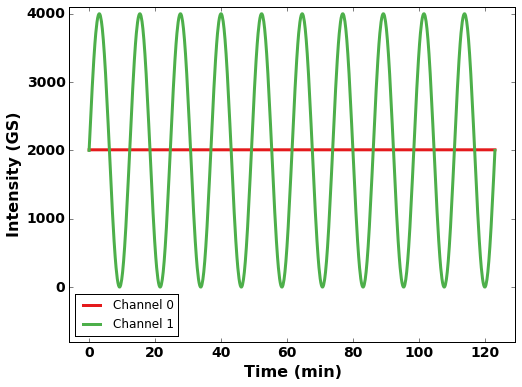

In [6]:
lpfp.plotLPFData(lpfdata['data'], wellIndices=wellIndices, savePath=savePath, mplargs={})

### This plot can be modified extensively using the `mplargs` argument:

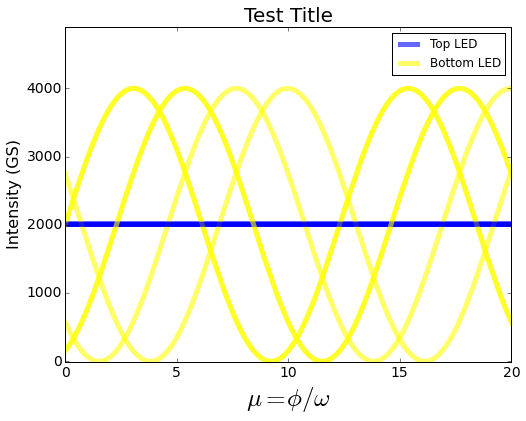

In [9]:
mplargs={'legend_loc':'upper right',
         'title': 'Test Title',
         'lw': 5,
         'alpha': 0.6,
         'xlabel': '$\mu=\phi/\omega$',
         'xlabel_size': 25,
         'fontweight': 'normal',
         'chColors': ['blue', 'yellow'],
         'xlim': (0,20),
         'ylim': (-5, 4900),
         'chLabels': ['Top LED', 'Bottom LED']}
lpfp.plotLPFData(lpfdata['data'], channels=[0,1], wellIndices=[0,1,2,3,4,5], mplargs=mplargs)